# 决策树

在学习和理解决策树的开始时，我想当然地把它类比成了另一种kNN而已，然而事实并非如此，所以花了两天时间才算是弄清楚它的原理。因此建议在这部分内容学习的时候不要只看网上的实现算法，最好看周志华老师的《机器学习》一章节进行理解，然后再抄一遍网上的例子跑一下，或者直接用代码实现《机器学习》上的示例。

这里只是按照本人觉得比较好理解的方式，把网上的资料重新整理了一下。

## 一、典型应用场景

这里有两个典型的应用场景，大家应该都见过。
1. 曾有段时间有很多使用“天猫精灵”（一款阿里的AI语音助手）玩猜人物游戏。即你先在心里想好某个人物，比如“曹操”，然后用笔写下。然后跟“天猫精灵”说开始游戏，接下来它会问一些问题。例如“他是否还在世？”而你需要回答“是”或者“否”。在一些问题过后，它就会告诉你你刚想的那个人物的名字。

2. 更泛化一点的就有很多了，比如“相亲”或者“面试”一个应聘者能否被选上需要经过多次筛选。

以上的两个场景实际都是通过一轮轮提问和回答来不断地确定缩小问题的范围，从而得到一个相较可信的参考结果。从大的思想上说，跟“分而治之”的思想也是有继承性的。从编码的形式上看就是if-then的结构。不过在实现决策树的代码上还是有不小差异的。

## 二、决策树

在我理解决策树的过程来看，先上定义再去做实例似乎不好理解。因此，这里先来做一些其他事，看完结果再来反推原因，这样也许更好理解一些。以下代码可以现在不用理解。

**决策树的定义** 
分类决策树模型是一种描述对实例进行分类的树形结构。决策树由结点（node）和有向边（directed edge）组成。结点有两种类型：内部结点（internal node）和叶结点（leaf node）。内部结点表示一个特征或属性（features），叶结点表示一个类（labels）。

用决策树对需要测试的实例进行分类：从根节点开始，对实例的某一特征进行测试，根据测试结果，将实例分配到其子结点；这时，每个子结点对应着该特征的一个取值。如此递归地对实例进行测试并分配，直至达到叶结点。最后将实例分配到叶结点的类中。

###  1. 决策树的一个示例代码

['年龄', '有工作', '有房', '信贷情况']
第0个特征的增益为0.083
第1个特征的增益为0.324
第2个特征的增益为0.420
第3个特征的增益为0.363
第0个特征的增益为0.252
第1个特征的增益为0.918
第2个特征的增益为0.474
{'有房': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}
是否放贷： yes


#### 2. 决策树可视化代码

代码来源：https://asialee.blog.csdn.net/article/details/81118245

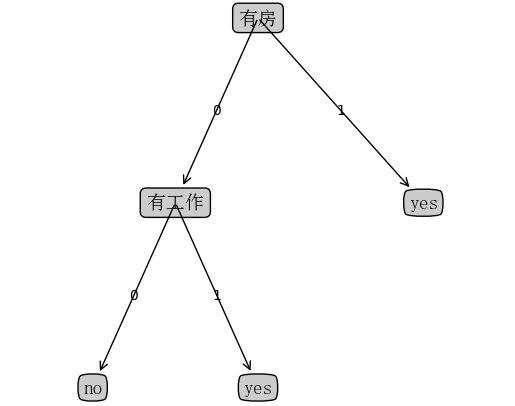

In [33]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
 
 
#定义文本框和箭头格式
decisionNode=dict(boxstyle='sawtooth',fc='0.8')
leafNode=dict(boxstyle='round4',fc='0.8')
arrow_args=dict(arrowstyle='<-')
#设置中文字体
font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)
 
 
"""
函数说明:获取决策树叶子结点的数目
Parameters:
    myTree - 决策树
Returns:
    numLeafs - 决策树的叶子结点的数目
"""
def getNumLeafs(myTree):
    numLeafs = 0                   #初始化叶子
    # python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，
    # 可以使用list(myTree.keys())[0]
    firstStr = next(iter(myTree))
    secondDict = myTree[firstStr]                      #获取下一组字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':     #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs +=1
    return numLeafs
 
 
"""
函数说明:获取决策树的层数
Parameters:
    myTree - 决策树
Returns:
    maxDepth - 决策树的层数
"""
def getTreeDepth(myTree):
    maxDepth = 0                                  #初始化决策树深度
    # python3中myTree.keys()返回的是dict_keys,不在是list,所以不能使用myTree.keys()[0]的方法获取结点属性，
    # 可以使用list(myTree.keys())[0]
    firstStr = next(iter(myTree))
    secondDict = myTree[firstStr]                          #获取下一个字典
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':         #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth      #更新层数
    return maxDepth
 
 
"""
函数说明:绘制结点
Parameters:
    nodeTxt - 结点名
    centerPt - 文本位置
    parentPt - 标注的箭头位置
    nodeType - 结点格式
"""
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    arrow_args = dict(arrowstyle="<-")                                          #定义箭头格式
    font = FontProperties(fname=r"c:\windows\fonts\simsun.ttc", size=14)        #设置中文字体
    createPlot.ax1.annotate(nodeTxt, xy=parentPt,  xycoords='axes fraction',    #绘制结点
                            xytext=centerPt, textcoords='axes fraction',
                            va="center", ha="center", bbox=nodeType, arrowprops=arrow_args,fontproperties=font)
 
 
"""
函数说明:标注有向边属性值
Parameters:
    cntrPt、parentPt - 用于计算标注位置
    txtString - 标注的内容
"""
def plotMidText(cntrPt, parentPt, txtString):
    xMid = (parentPt[0]-cntrPt[0])/2.0 + cntrPt[0]                               #计算标注位置
    yMid = (parentPt[1]-cntrPt[1])/2.0 + cntrPt[1]
    # createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center", rotation=30)
    createPlot.ax1.text(xMid, yMid, txtString, va="center", ha="center")
 
 
"""
函数说明:绘制决策树
Parameters:
    myTree - 决策树(字典)
    parentPt - 标注的内容
    nodeTxt - 结点名
"""
def plotTree(myTree, parentPt, nodeTxt):
    # decisionNode = dict(boxstyle="sawtooth", fc="0.8")                                    #设置结点格式
    decisionNode = dict(boxstyle="round", fc="0.8")                                    #设置结点格式
    leafNode = dict(boxstyle="round4", fc="0.8")                                          #设置叶结点格式
    numLeafs = getNumLeafs(myTree)                                                        #获取决策树叶结点数目，决定了树的宽度
    depth = getTreeDepth(myTree)                                                          #获取决策树层数
    firstStr = next(iter(myTree))                                                         #下个字典
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff) #中心位置
    plotMidText(cntrPt, parentPt, nodeTxt)                                                #标注有向边属性值
    plotNode(firstStr, cntrPt, parentPt, decisionNode)                                    #绘制结点
    secondDict = myTree[firstStr]                                                         #下一个字典，也就是继续绘制子结点
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD                                   #y偏移
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':                 #测试该结点是否为字典，如果不是字典，代表此结点为叶子结点
            plotTree(secondDict[key],cntrPt,str(key))              #不是叶结点，递归调用继续绘制
        else:                                                      #如果是叶结点，绘制叶结点，并标注有向边属性值
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff), cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
 
 
"""
函数说明:创建绘制面板
Parameters:
    inTree - 决策树(字典)
"""
def createPlot(inTree):
    fig = plt.figure(1, facecolor='white')                               #创建fig
    fig.clf()                                                            #清空fig
    axprops = dict(xticks=[], yticks=[])
    createPlot.ax1 = plt.subplot(111, frameon=False, **axprops)          #去掉x、y轴
    plotTree.totalW = float(getNumLeafs(inTree))                         #获取决策树叶结点数目
    plotTree.totalD = float(getTreeDepth(inTree))                        #获取决策树层数
    plotTree.xOff = -0.5/plotTree.totalW; plotTree.yOff = 1.0;           #x偏移
    plotTree(inTree, (0.5,1.0), '')                                      #绘制决策树
    plt.show()
 
 
if __name__=='__main__':
    mytree={'有房': {0: {'有工作': {0: 'no', 1: 'yes'}}, 1: 'yes'}}
    # mytree={'不浮出水面可以生存': {0: 'no', 1: {'有脚蹼': {0: 'no', 1: 'yes'}}}}

    createPlot(mytree)

### 3. 引例

忘掉上面的代码，先看两个具体的问题。

**项目案例1：判定鱼类和非鱼类**

这个示例来自《机器学习实践》。

项目描述：根据以下2个特征，将动物分成两类：鱼类和非鱼类。
特征：
1. 不浮出水面是否可以生存
2. 是否有脚蹼

假如我们收集到这样的一个数据表

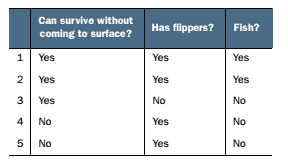

no surfacing: 不露出水面是否可以生存？
flippers: 是否有脚蹼？

| 序号 | 不浮出水面可以生存 | 是否有脚蹼 | 属于鱼类 |
|---|---|---|---|
| 1 | 是 | 是 | 是 |
| 2 | 是 | 是 | 是 |
| 3 | 是 | 否 | 否 |
| 4 | 否 | 是 | 否 |
| 5 | 否 | 是 | 否 |

通过以上数据，我们现在要判定一种新的动物，它可以不浮出水面生存，且有脚蹼，那么它是鱼类吗？

很显然地，我们可以做出这样一个判断流程：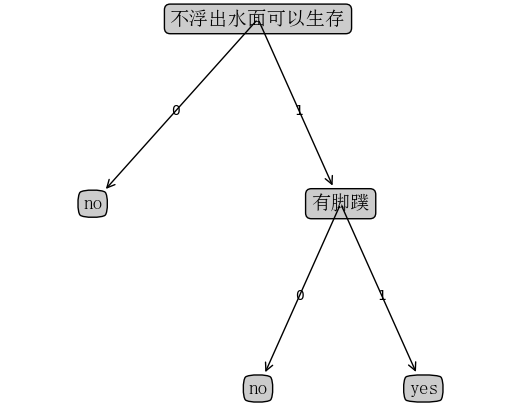

从上图的流程中，我们按照类似“天猫精灵”猜人游戏的玩法，我们可以问出如下两个问题：
1、它可以不浮出水面生存吗？
如果回答“否”，那么它不是鱼类，如果回答“是”则可以进行第二次提问。
2、如果回答“否”，那么它不是鱼类，否则就是鱼类。

到这里，可能会有些疑惑，就这种问题还需要用“机器学习”算法？直接“if else”不就结了？我们先不纠结这个问题，再看另一个案例。

**项目案例2：贷款申请审批**

这些年活在这个国度里，最折磨人的事莫过于买房吧？而买房的绝大多数应该是需要申请贷款的。即使不买房，花呗、借呗、信用卡等等各种小额借贷产品，相信大家即使没用过肯定也听过。相信大多数人是用过的。
那么，放贷公司如何判断一个人可否给他审批贷款申请呢？如何给他确定贷款额度呢？要确定这些问题，本质上是需要对申请人做一个还贷能力以及综合信用的评估。如果一个人还贷能力强，即收入高工作又稳定，而且信用还非常好，那把贷款审批给他，对于贷款公司来说风险肯定小，坏账率就低。反之，就要考虑不给申请人通过贷款审批了。

现在，我们不是借贷公司，不需要做一个对贷款人完善的评价体系。因此，我们简化了一些评估项目。假如收集到如下数据：

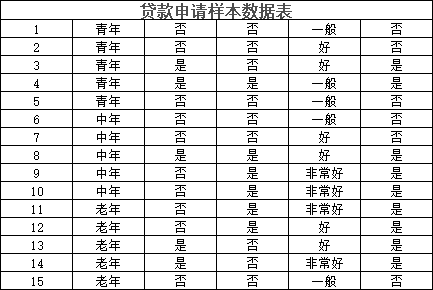

为了便于处理，我们需要对数据做一些处理：

- 年龄：0代表青年，1代表中年，2代表老年；
- 有工作：0代表否，1代表是；
- 有自己的房子：0代表否，1代表是；
- 信贷情况：0代表一般，1代表好，2代表非常好；
- 是否给贷款：no代表否，yes代表是。

数据处理之后：

| 序号 | 年龄 | 有工作 | 有房 | 信贷情况 | 是否放贷 |
|---|---|---|---|---|---|
| 1 | 0 | 0 | 0 | 0 | 'no' |
| 2 | 0 | 0 | 0 | 1 | 'no' |
| 3 | 0 | 1 | 0 | 1 | 'yes' |
| 4 | 0 | 1 | 1 | 0 | 'yes' |
| 5 | 0 | 0 | 0 | 0 | 'no' |
| 6 | 1 | 0 | 0 | 0 | 'no' |
| 7 | 1 | 0 | 0 | 1 | 'no' |
| 8 | 1 | 1 | 1 | 1 | 'yes' |
| 9 | 1 | 0 | 1 | 2 | 'yes' |
| 10 | 1 | 0 | 1 | 2 | 'yes' |
| 11 | 2 | 0 | 1 | 2 | 'yes' |
| 12 | 2 | 0 | 1 | 1 | 'yes' |
| 13 | 2 | 1 | 0 | 1 | 'yes' |
| 14 | 2 | 1 | 0 | 2 | 'yes' |
| 15 | 2 | 0 | 0 | 0 | 'no' |

那假如现在有一位有工作的中年人没房子还欠了一笔债，我们要不要给他放贷呢？这个时候的“if else”将要怎么写呢？不如先按案例1的方式，构造出这样的问答完整流程：

1. 申请者年龄？
    如果是“青年”，转第2步；如果是“中年”转第3步，“老年”转第4步；
2. 是否有工作？
    如果“有”转2.1步，如果“没有”转2.2步；
    1. 是否有房？
        如果“有”转2.1.1步，如果“没有”转2.1.2步
        1. 信贷情况？
            如果“一般”则“yes”（放贷），其他的没参考，不知道要不要放贷。
        2. 信贷情况？
            如果是“好”则“yes”（放贷），其他情况没参考，不知道要不要放贷。
    2. 是否有房？
        如果“没房”且信贷情况是“一般”或者“好”，则不放贷，其他情况不知道要不要放贷。

……

完整流程有点复杂，看上去不是那么好构造，“if else”也有点不够用了……

那就只考虑测试用例的情况：
1、年龄是多少？
    中年，符合的示例是：{6,7,8,9,10}
2、是否有工作？
    有，符合的的示例是：{8}
3、是否有房？
    无，没有符合的示例，流程走不下去了。那这时要不要给他放贷呢？

即使在简化的流程下也没法完全走完所有的“if-else”，在这种情况下该如何得出一个相对“不错”的结论呢？此外，把“年龄”作为第一个问题会不会有问题？如果把“有工作”或者“有房”作为第一个问题情况会怎样？该怎样来选择第一个问题呢？种种的此类问题，看上去是超越了朴素的“if-else”逻辑了。

### 4. 信息熵 & 信息增益

前面的问题显然已经处于“知识盲区”了，因此，为了解决这样的问题不得不引出一些新的理论和概念。
现在考虑如何选择第一个问题。即从哪个维度考虑权重最高？这里引入“信息熵”的概念。

**熵（entropy）**: 熵指的是体系的混乱的程度，在不同的学科中也有引申出的更为具体的定义，是各领域十分重要的参量。

**信息论（information theory）中的熵（香农熵）**: 是一种信息的度量方式，表示信息的混乱程度，也就是说: 信息越有序，信息熵越低。例如: 火柴有序放在火柴盒里，熵值很低，相反，熵值很高。

**信息增益（information gain）**: 在划分数据集前后信息发生的变化称为信息增益。

因此，通过对比每个“属性”信息增益，就可以知道哪个“属性”信息量最大。只需要每次都从信息增益最大的“属性”进行提问就会有一个最优解。而对于为什么“熵”值商的“属性”信息量最大，则应该去研究信息论。

**信息熵的计算**：

熵定义为信息的期望值，在明晰这个概念之前，必须知道信息的定义。如果待分类的事务可能划分在多个分类之中，则符号 $x_i$ 的信息定义为 $$ l(x_i) = -log_2p(x_i) $$

其中 $ p(x_i) $ 是选择该分类的概率。
为了计算信息熵，我们需要计算所有类别的所有可能值包含的信息期望值，通过下面的公式得到：
$$ H = -\displaystyle\sum_{i=1}^n p(x_i)log_2 p(x_i) $$
公式中的 $n$ 是分类的个数，即结果“标记”类别数量。

### 5. 构建决策树

无论从网上大多《机器学习实战》的实例代码来看，还是周志华老师的《机器学习》中的伪代码来看，似乎都没有很直观的感觉。那不如先抄一段别人的代码再理解一下。

代码来源：https://asialee.blog.csdn.net/article/details/81118245

先看第一个案例。

| 序号 | 不浮出水面可以生存 | 是否有脚蹼 | 属于鱼类 |
|---|---|---|---|
| 1 | 是 | 是 | 是 |
| 2 | 是 | 是 | 是 |
| 3 | 是 | 否 | 否 |
| 4 | 否 | 是 | 否 |
| 5 | 否 | 是 | 否 |


no surfacing:不露出水面是否可以生成？
flippers:是否有脚蹼？




为了选择熵最有“信息”的一个特征，我们必须先计算每个特征的熵。
首先由数据集标签可知，数据中属于鱼类的概率是 $\frac{2}{5}$，不属于鱼类的概率是 $\frac{3}{5}$ .由最后一列计数可以得到
所以熵为0.971，按“不浮出水面可以生存”进行划分，可以分成两个子集：D1 = {1,2,3}、D2 = {4，5}。在D1中正例占2/3，反例占1/3，在D2中正例占0, 反例占1/2
因此Ent(D1) = 0.918，Ent(D2) = 0，再分别乘上各子集的取得概率，即0.6和0.4，最终得到划分后熵为0.551。
得到信息增益：0.420。
这里需要解释的是，由于“不浮出水面可以生存”如果是“否”没有正类，所以熵值为0。
再按“是否有脚蹼”进行划化，得到信息增益为0.171，因此优先选择特征“不浮出水面可以生存”进行划分。

In [74]:
# -*- coding: UTF-8 -*-
from math import log
import operator

"""
函数说明:创建测试数据集
"""
# def createDataSet():
#     dataSet = [[0, 0, 0, 0, 'no'],         #数据集
#                [0, 0, 0, 1, 'no'],
#                [0, 1, 0, 1, 'yes'],
#                [0, 1, 1, 0, 'yes'],
#                [0, 0, 0, 0, 'no'],
#                [1, 0, 0, 0, 'no'],
#                [1, 0, 0, 1, 'no'],
#                [1, 1, 1, 1, 'yes'],
#                [1, 0, 1, 2, 'yes'],
#                [1, 0, 1, 2, 'yes'],
#                [2, 0, 1, 2, 'yes'],
#                [2, 0, 1, 1, 'yes'],
#                [2, 1, 0, 1, 'yes'],
#                [2, 1, 0, 2, 'yes'],
#                [2, 0, 0, 0, 'no']]
#     labels = ['年龄', '有工作', '有房', '信贷情况']        #分类属性
#     return dataSet, labels                           #返回数据集和分类属性

def createDataSet():
    dataSet = [
        [1, 1, 'yes'],
        [1, 1, 'yes'],
        [1, 0, 'no'],
        [0, 1, 'no'],
        [0, 1, 'no']
    ]
    labels = ['不浮出水面可以生存', '有脚蹼','鱼类']
    return dataSet, labels

 
"""
函数说明:计算给定数据集的经验熵(香农熵)
Parameters:
    dataSet - 数据集
Returns:
    shannonEnt - 经验熵(香农熵)
"""
def calcShannonEnt(dataSet):
    numEntires = len(dataSet)                        #返回数据集的行数
    labelCounts = {}                                 #保存每个标签(Label)出现次数的字典
    for featVec in dataSet:                          #对每组特征向量进行统计
        currentLabel = featVec[-1]                   #提取标签(Label)信息
        if currentLabel not in labelCounts.keys():   #如果标签(Label)没有放入统计次数的字典,添加进去
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1               #Label计数
    shannonEnt = 0.0                                 #经验熵(香农熵)
    for key in labelCounts:                          #计算香农熵
        prob = float(labelCounts[key]) / numEntires  #选择该标签(Label)的概率
        shannonEnt -= prob * log(prob, 2)            #利用公式计算
    return shannonEnt                                #返回经验熵(香农熵)
 
 
"""
函数说明:按照给定特征划分数据集
Parameters:
    dataSet - 待划分的数据集
    axis - 划分数据集的特征
    value - 需要返回的特征的值
"""
def splitDataSet(dataSet, axis, value):
    retDataSet = []                                     #创建返回的数据集列表
    for featVec in dataSet:                             #遍历数据集
        if featVec[axis] == value:
            reducedFeatVec = featVec[:axis]             #去掉axis特征
            reducedFeatVec.extend(featVec[axis+1:])     #将符合条件的添加到返回的数据集
            retDataSet.append(reducedFeatVec)
    return retDataSet                                   #返回划分后的数据集
 
 
"""
函数说明:选择最优特征
Parameters:
    dataSet - 数据集
Returns:
    bestFeature - 信息增益最大的(最优)特征的索引值
"""
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1                     #特征数量
    baseEntropy = calcShannonEnt(dataSet)                 #计算数据集的香农熵
    print("base熵", baseEntropy)
    bestInfoGain = 0.0                                    #信息增益
    bestFeature = -1                                      #最优特征的索引值
    for i in range(numFeatures):                          #遍历所有特征
        #获取dataSet的第i个特征所有值
        featList = [example[i] for example in dataSet]
        print(featList)
        uniqueVals = set(featList)                         #创建set集合{},元素不可重复
        newEntropy = 0.0                                   #经验条件熵
        for value in uniqueVals:                           #计算信息增益
            subDataSet = splitDataSet(dataSet, i, value)           #subDataSet划分后的子集
            prob = len(subDataSet) / float(len(dataSet))           #计算子集的概率
            # newEntropy += prob * calcShannonEnt(subDataSet)        #根据公式计算经验条件熵
            ent = calcShannonEnt(subDataSet)
            print("Sub熵: %.3f, prob: %.3f" % (ent, prob))
            newEntropy += prob * ent
        infoGain = baseEntropy - newEntropy                        #信息增益
        print("baseEnt: %.3f, subEnt: %.3f, 第%d个特征的增益为%.3f" % (baseEntropy, newEntropy, i, infoGain))             #打印每个特征的信息增益
        if (infoGain > bestInfoGain):                              #计算信息增益
            bestInfoGain = infoGain                                #更新信息增益，找到最大的信息增益
            bestFeature = i                                        #记录信息增益最大的特征的索引值
    return bestFeature                                             #返回信息增益最大的特征的索引值
 
 
"""
函数说明:统计classList中出现此处最多的元素(类标签)
Parameters:
    classList - 类标签列表
Returns:
    sortedClassCount[0][0] - 出现此处最多的元素(类标签)
"""
def majorityCnt(classList):
    classCount = {}
    for vote in classList:                                        #统计classList中每个元素出现的次数
        if vote not in classCount.keys():
            classCount[vote] = 0
        classCount[vote] += 1
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)        #根据字典的值降序排序
    return sortedClassCount[0][0]                                #返回classList中出现次数最多的元素
 
 
"""
函数说明:递归构建决策树
Parameters:
    dataSet - 训练数据集
    labels - 分类属性标签
    featLabels - 存储选择的最优特征标签
Returns:
    myTree - 决策树
"""
def createTree(dataSet, labels, featLabels):
    classList = [example[-1] for example in dataSet]               #取分类标签(yes or no)
    
    if classList.count(classList[0]) == len(classList):            #如果类别完全相同则停止继续划分
        return classList[0]
    
    if len(dataSet[0]) == 1:                                       #遍历完所有特征时返回出现次数最多的类标签
        return majorityCnt(classList)
    
    bestFeat = chooseBestFeatureToSplit(dataSet)                   #选择最优特征

    bestFeatLabel = labels[bestFeat]                               #最优特征的标签
    
    featLabels.append(bestFeatLabel)
    print(featLabels)

    myTree = {bestFeatLabel:{}}                                    #根据最优特征的标签生成树

    del(labels[bestFeat])                                          #删除已经使用特征标签
    
    featValues = [example[bestFeat] for example in dataSet]        #得到训练集中所有最优特征的属性值
    
    uniqueVals = set(featValues)                                   #去掉重复的属性值
    
    for value in uniqueVals:
        subLabels=labels[:]
        #递归调用函数createTree(),遍历特征，创建决策树。
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels, featLabels)
    return myTree
 
 
"""
函数说明:使用决策树执行分类
Parameters:
    inputTree - 已经生成的决策树
    featLabels - 存储选择的最优特征标签
    testVec - 测试数据列表，顺序对应最优特征标签
Returns:
    classLabel - 分类结果
"""
def classify(inputTree, featLabels, testVec):
    firstStr = next(iter(inputTree))             #获取决策树结点
    secondDict = inputTree[firstStr]             #下一个字典
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else:
                classLabel = secondDict[key]
    return classLabel
 
 
if __name__ == '__main__':
    dataSet, labels = createDataSet()
    task = labels[-1]

    featLabels = []
    myTree = createTree(dataSet, labels, featLabels)
    print(myTree)
    testVec = [1, 1, 0, 1]     # 测试数据
    result = classify(myTree, featLabels, testVec)
    print("是否%s：%s" % (task, result))
    # if result == 'yes':
    #     print(labels)
    # if result == 'no':
    #     print(labels)

base熵 0.9709505944546686
[1, 1, 1, 0, 0]
Sub熵: 0.000, prob: 0.400
Sub熵: 0.918, prob: 0.600
baseEnt: 0.971, subEnt: 0.551, 第0个特征的增益为0.420
[1, 1, 0, 1, 1]
Sub熵: 0.000, prob: 0.200
Sub熵: 1.000, prob: 0.800
baseEnt: 0.971, subEnt: 0.800, 第1个特征的增益为0.171
['不浮出水面可以生存']
base熵 0.9182958340544896
[1, 1, 0]
Sub熵: 0.000, prob: 0.333
Sub熵: 0.000, prob: 0.667
baseEnt: 0.918, subEnt: 0.000, 第0个特征的增益为0.918
['不浮出水面可以生存', '有脚蹼']
{'不浮出水面可以生存': {0: 'no', 1: {'有脚蹼': {0: 'no', 1: 'yes'}}}}
是否鱼类：yes


In [ ]:

'''
@description: 计算给定数据集的香农熵
@param {type} 数据集
@return: 返回 每一组feature下的某个分类下，香农熵的信息期望
eg:dataSet下 Yes/No 分类下香农熵大小 0.970950594455 信息越有序，信息熵越低。
'''
def calcShannonEnt(dataSet):
    # -----------计算香农熵的第一种实现方式start------------------------------------
    #
    # numEntries = len(dataSet)
    # labelsCounts = {}
    # for featVec in dataSet:
    #     currentLabel = featVec[-1]
    #     if currentLabel not in labelsCounts.keys():
    #         labelsCounts[currentLabel] = 0
    #     labelsCounts[currentLabel] += 1
    # shannonEnt = 0.0
    # for key in labelsCounts:
    #     prob = float(labelsCounts[key])/numEntries
    #     shannonEnt -= prob * log(prob, 2)
    # -----------计算香农熵的第一种实现方式end----------------------------------------

    # # -----------计算香农熵的第二种实现方式start------------------------------------
    # # 统计标签出现的次数
    #eg:Counter({'no': 3, 'yes': 2})
    label_count = Counter(data[-1] for data in dataSet)
    # # 计算概率
    probs = [float(p[1]) / len(dataSet) for p in label_count.items()]
    # # 计算香农熵
    shannonEnt = sum([-p * log(p, 2) for p in probs])
    # -----------计算香农熵的第二种实现方式end----------------------------------------
    return shannonEnt


'''
@description: 按照给定特征划分数据集
@param {dataSet 数据集 : 待划分的数据集 
        index 表示每一行的index列 :划分数据集的特征
        value 表示index列对应的value值 :需要返回的特征的值
} 
@return: index列为value的数据集【该数据集需要排除index列】
demo:dataSet=[[1, 1, 'yes'],
      [1, 1, 'yes'],
      [1, 0, 'no'],
      [0, 1, 'no'],
      [0, 1, 'no']]
      splitDataSet(dataSet,0,1)
      这个方法代表的意思就是在上面的数据集中找到第0列值是1的数据 返回出来 并且返回值中不包含第0列的值
      现在可以看到第0列值为1的数据有[1, 1, 'yes']，[1, 1, 'yes']，[1, 0, 'no']三个，然后去掉第0列
      的值返回出来的就是[1, 'yes'], [1, 'yes'], [0, 'no']
'''
def splitDataSet(dataSet, index, value):
    # -----------划分数据集的第一种方式 start------------------------------------
    retDataSet = []
    for featVec in dataSet:
        # index列为value的数据集【该数据集需要排除index列】
        # 判断index列的值是否为value
        if featVec[index] == value:
            # [:index]表示前index行，即若 index 为2，就是取 featVec 的前 index 行
            reduceFeatVec = featVec[:index]
            # [index+1:]表示从跳过 index 的 index+1行，取接下来的数据
            # 收集结果值 index列为value的行【该行需要排除index列】
            '''
            对于extend append
            list.append(object) 向列表中添加一个对象object
            list.extend(sequence) 把一个序列seq的内容添加到列表中
            1、使用append的时候，是将new_media看作一个对象，整体打包添加到music_media对象中。
            2、使用extend的时候，是将new_media看作一个序列，将这个序列和music_media序列合并，并放在其后面。
            result = []
            result.extend([1,2,3])
            print result
            result.append([4,5,6])
            print result
            result.extend([7,8,9])
            print result
            结果：
            [1, 2, 3]
            [1, 2, 3, [4, 5, 6]]
            [1, 2, 3, [4, 5, 6], 7, 8, 9]
            '''
            reduceFeatVec.extend(featVec[index+1:])
            retDataSet.append(reduceFeatVec)
    # -----------划分数据集的第一种方式 end------------------------------------
    # -----------划分数据集的第二种方式 start------------------------------------
    #retDataSet = [data for data in dataSet for i,v in enumerate(data) if i == index and v == value]
    #这个没有排除第index列
    return retDataSet

'''
@description: 选择最好的数据集划分方式
@param {dataSet:数据集} 
@return: bestFeature ：最优的特征列
demo:可以看出infoGain信息增益0的时候是比较大的 所以最好的特征是0
输出：infoGain= 0.419973094022 bestFeature= 0 0.970950594455 0.550977500433
    infoGain= 0.170950594455 bestFeature= 1 0.970950594455 0.8
    最后返回的最好的数据集bestFeature=0
'''
def chooseBestFeatureToSplit(dataSet):
    # -----------选择最优特征的第一种方式 start------------------------------------
    #先求第一行有多少特征 最后一行是label标签所以减去1
    numFeatures = len(dataSet[0]) - 1
    #Label标签信息熵
    baseEntropy = calcShannonEnt(dataSet)
    # 最优的信息增益值, 和最优的Featurn编号
    bestInfoGain, bestFeature = 0.0, -1
    for i in range(numFeatures):
        # 获取每一个实例的第i+1个feature，组成list集合
        #eg:[1, 1, 1, 0, 0] [1, 1, 0, 1, 1]
        featList = [example[i] for example in dataSet]
        # 获取剔重后的集合，使用set对list数据进行去重
        #eg:set([0, 1]) set([0, 1])
        uniqueVals = set(featList)
        # 创建一个临时的信息熵
        newEntropy = 0.0
        # 遍历某一列的value集合，计算该列的信息熵 
        # 遍历当前特征中的所有唯一属性值，对每个唯一属性值划分一次数据集，计算数据集的新熵值，并对所有唯一特征值得到的熵求和。
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            #计算这个subDataSet占整个dataSet的概率是多少
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        # gain[信息增益]: 划分数据集前后的信息变化， 获取信息熵最大的值
        # 信息增益是熵的减少或者是数据无序度的减少。最后，比较所有特征中的信息增益，返回最好特征划分的索引值。
        infoGain = baseEntropy - newEntropy
        #print('infoGain=', infoGain, 'bestFeature=', i, baseEntropy, newEntropy)
        if(infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i
    # -----------选择最优特征的第一种方式 end------------------------------------
    # # -----------选择最优特征的第二种方式 start------------------------------------
    # # 计算初始香农熵
    # base_entropy = calcShannonEnt(dataSet)
    # best_info_gain = 0
    # best_feature = -1
    # # 遍历每一个特征
    # for i in range(len(dataSet[0]) - 1):
    #     # 对当前特征进行统计
    #     feature_count = Counter([data[i] for data in dataSet])
    #     # 计算分割后的香农熵
    #     new_entropy = sum(feature[1] / float(len(dataSet)) * calcShannonEnt(splitDataSet(dataSet, i, feature[0])) \
    #                    for feature in feature_count.items())
    #     # 更新值
    #     info_gain = base_entropy - new_entropy
    #     print('No. {0} feature info gain is {1:.3f}'.format(i, info_gain))
    #     if info_gain > best_info_gain:
    #         best_info_gain = info_gain
    #         best_feature = i
    # return best_feature
    # # -----------选择最优特征的第二种方式 end------------------------------------
    return bestFeature



　　loop(dataSet):

　　　　if dataSet 所有分类都是同一个，返回该分类

　　　　if dataSet 没有可以进行选择的条件了，返回该结果集大部分指向的分类

　　　　通过信息增益指标，选择当前dataSet最有决定性的特征

　　　　for 该特征的值：

　　　　　　该值所得出的子集subDataSet

　　　　　　tree = loop(subDataSet) 构建该特征的该值的子树

　　　　return tree
